<a href="https://colab.research.google.com/github/efandraekaj57/SISTEM-PREDICTION-MENTAL-HEALTH/blob/main/PERCOBAAN_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ======================================================
# BAGIAN 1 — UPLOAD DUA FILE ZIP DATASET
# ======================================================
from google.colab import files
import zipfile, os, pandas as pd, numpy as np
print("Silakan upload dua file ZIP dataset (misalnya: mental_data1.zip, mental_data2.zip)")
uploaded = files.upload()

zip_names = list(uploaded.keys())
print("\nFile ZIP yang diupload:", zip_names)

Silakan upload dua file ZIP dataset (misalnya: mental_data1.zip, mental_data2.zip)


Saving archive (1).zip to archive (1).zip
Saving Mental-health-tables-National.zip to Mental-health-tables-National.zip

File ZIP yang diupload: ['archive (1).zip', 'Mental-health-tables-National.zip']


In [2]:
# ======================================================
# BAGIAN 2 — EKSTRAK SEMUA ZIP
# ======================================================
extract_dirs = []
for zip_name in zip_names:
    extract_dir = zip_name.replace(".zip", "_extracted")
    os.makedirs(extract_dir, exist_ok=True)
    with zipfile.ZipFile(zip_name, 'r') as zf:
        zf.extractall(extract_dir)
    extract_dirs.append(extract_dir)
    print(f"Berhasil diekstrak: {zip_name} → {extract_dir}")

Berhasil diekstrak: archive (1).zip → archive (1)_extracted
Berhasil diekstrak: Mental-health-tables-National.zip → Mental-health-tables-National_extracted


In [3]:
# =============================================
# BAGIAN 3 — DETEKSI SEMUA FILE DATA
# =============================================
data_files = []
for extract_dir in extract_dirs:
    for root, _, files_ in os.walk(extract_dir):
        for f in files_:
            if f.lower().endswith(('.csv', '.xlsx', '.xls')):
                data_files.append(os.path.join(root, f))

if not data_files:
    raise SystemExit("Tidak ditemukan file .csv / .xlsx / .xls di dalam ZIP manapun.")

print(f"\nTotal ditemukan {len(data_files)} file data:")
for f in data_files:
    print(" -", f)


Total ditemukan 18 file data:
 - archive (1)_extracted/Combined Data.csv
 - Mental-health-tables-National_extracted/Table 6 - Consultations with health professionals for mental health by age and sex.xlsx
 - Mental-health-tables-National_extracted/Table 13 - Perceived need for help for people who did not consult a health professional.xlsx
 - Mental-health-tables-National_extracted/Table 17 - PBS mental health-related medications dispensed in the last 12 months by age and sex.xlsx
 - Mental-health-tables-National_extracted/Table 5 - 12-month mental disorder groups by selected health characteristics.xlsx
 - Mental-health-tables-National_extracted/Table 4 - 12-month mental disorder groups by selected household and population characteristics.xlsx
 - Mental-health-tables-National_extracted/Table 10 - Whether close to someone who took or attempted to take own life by age and sex.xlsx
 - Mental-health-tables-National_extracted/Table 12 - Perceived need for help for people who consulted a heal

In [4]:
# =============================================
# BAGIAN 4 — MEMBACA SEMUA DATA DAN MENGGABUNGKAN
# =============================================
import pandas as pd

df_list = []
for f in data_files:
    try:
        temp = pd.read_csv(f) if f.endswith(".csv") else pd.read_excel(f)
        df_list.append(temp)
        print(f" {os.path.basename(f)} dimuat dengan shape {temp.shape}")
    except Exception as e:
        print(f"Gagal membaca {f}: {e}")

df = pd.concat(df_list, ignore_index=True)
print("\nData gabungan dimuat dengan shape:", df.shape)
df.head()

 Combined Data.csv dimuat dengan shape (53043, 3)
 Table 6 - Consultations with health professionals for mental health by age and sex.xlsx dimuat dengan shape (16, 2)
 Table 13 - Perceived need for help for people who did not consult a health professional.xlsx dimuat dengan shape (16, 2)
 Table 17 - PBS mental health-related medications dispensed in the last 12 months by age and sex.xlsx dimuat dengan shape (16, 2)
 Table 5 - 12-month mental disorder groups by selected health characteristics.xlsx dimuat dengan shape (16, 2)
 Table 4 - 12-month mental disorder groups by selected household and population characteristics.xlsx dimuat dengan shape (16, 3)
 Table 10 - Whether close to someone who took or attempted to take own life by age and sex.xlsx dimuat dengan shape (16, 2)
 Table 12 - Perceived need for help for people who consulted a health professional.xlsx dimuat dengan shape (16, 2)
 Table 14 - Aspects of disordered eating.xlsx dimuat dengan shape (16, 2)
 Table 15 - Social connecte

,Unnamed: 0,statement,status,This tab outlines the contents of datacube 6. It ranges from cell A1 to B17.,Unnamed: 1,This tab outlines the contents of datacube 13. It ranges from cell A1 to B17.,This tab outlines the contents of datacube 17. It ranges from cell A1 to B17.,This tab outlines the contents of datacube 5. It ranges from cell A1 to B17.,This tab outlines the contents of datacube 4. It ranges from cell A1 to B17.,This tab outlines the contents of datacube 4. It ranges from cell A1 to B17..1,...,This tab outlines the contents of datacube 14. It ranges from cell A1 to B17.,This tab outlines the contents of datacube 15. It ranges from cell A1 to B17,This tab outlines the contents of datacube 3. It ranges from cell A1 to B17.,This tab outlines the contents of datacube 2. It ranges from cell A1 to B17.,This tab outlines the contents of datacube 1. It ranges from cell A1 to B17.,This tab outlines the contents of datacube 8. It ranges from cell A1 to B17.,This tab outlines the contents of datacube 11. It ranges from cell A1 to B17.,This tab outlines the contents of datacube 7. It ranges from cell A1 to B17.,This tab outlines the contents of datacube 16. It ranges from cell A1 to B17.,This tab outlines the contents of datacube 9. It ranges from cell A1 to B17.
0,0.0,oh my gosh,Anxiety,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,"trouble sleeping, confused mind, restless hear...",Anxiety,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,I've shifted my focus to something else but I'...,Anxiety,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,"I'm restless and restless, it's been a month n...",Anxiety,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# ======================================================
# BAGIAN 5 — PEMBERSIHAN DASAR
# ======================================================
df = df.loc[:, df.notna().any()]
df = df.drop_duplicates()

# Deteksi kolom target otomatis
target_candidates = [c for c in df.columns if any(x in c.lower() for x in
    ["depress", "anxiet", "score", "diagnos", "phq", "gad", "k10", "mental", "disorder"])]
if target_candidates:
    target_col = target_candidates[0]
else:
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    target_col = numeric_cols[-1] if numeric_cols else df.columns[-1]

print(f"\nKolom target yang digunakan: {target_col}")

# Buat kolom target biner (0/1)
if pd.api.types.is_numeric_dtype(df[target_col]):
    threshold = df[target_col].median(skipna=True)
    df["target_binary"] = (df[target_col] > threshold).astype(int)
else:
    df["target_binary"] = df[target_col].astype("category").cat.codes


Kolom target yang digunakan: Unnamed: 0


In [6]:
# ======================================================
# BAGIAN 6 — IMPUTASI DAN ENCODING
# ======================================================
from sklearn.impute import SimpleImputer

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

num_imputer = SimpleImputer(strategy="median")
cat_imputer = SimpleImputer(strategy="constant", fill_value="Unknown")

if num_cols:
    df[num_cols] = num_imputer.fit_transform(df[num_cols])
if cat_cols:
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# One-hot encoding (untuk kategori dengan <= 20 kategori unik)
for c in cat_cols:
    if df[c].nunique() <= 20:
        dummies = pd.get_dummies(df[c].astype(str), prefix=c)
        df = pd.concat([df.drop(columns=[c]), dummies], axis=1)
    else:
        df[c] = df[c].astype("category").cat.codes

In [7]:
# ======================================================
# BAGIAN 7 — STANDARDISASI FITUR
# ======================================================
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_features = [c for c in df.select_dtypes(include=[np.number]).columns if c != "target_binary"]
df[num_features] = scaler.fit_transform(df[num_features])

In [8]:
# ======================================================
# BAGIAN 8 — SIMPAN DATA HASIL PREPROCESSING
# ======================================================
output_file = "processed_mental_health_combined.csv"
df.to_csv(output_file, index=False)
print(f"\nData berhasil digabung & diproses → {output_file}")
print(f"Jumlah baris: {len(df)}, kolom: {len(df.columns)}")


Data berhasil digabung & diproses → processed_mental_health_combined.csv
Jumlah baris: 53315, kolom: 301


In [9]:
import pandas as pd

# Baca dataset CSV
df = pd.read_csv("processed_mental_health_combined.csv")

# Tampilkan 10 baris pertama
print("=== 10 BARIS PERTAMA DATASET ===")
print(df.head(10).to_string())

# Tampilkan daftar kolom asli
print("\n=== NAMA KOLOM INPUT ===")
for i, col in enumerate(df.columns, start=1):
    print(f"{i:3}. {col}")

=== 10 BARIS PERTAMA DATASET ===
   Unnamed: 0  statement  Unnamed: 1  target_binary  status_Anxiety  status_Bipolar  status_Depression  status_Normal  status_Personality disorder  status_Stress  status_Suicidal  status_Unknown  This tab outlines the contents of datacube 6. It ranges from cell A1 to B17._            Australian Bureau of Statistics  This tab outlines the contents of datacube 6. It ranges from cell A1 to B17._Australian Bureau of Statistics website  This tab outlines the contents of datacube 6. It ranges from cell A1 to B17._Contact us if you have an enquiry about these statistics or to get assistance  This tab outlines the contents of datacube 6. It ranges from cell A1 to B17._Contents  This tab outlines the contents of datacube 6. It ranges from cell A1 to B17._Further information  This tab outlines the contents of datacube 6. It ranges from cell A1 to B17._National Study of Mental Health and Wellbeing: Summary Results, 2020–2022  This tab outlines the contents of data


Train: 42652 | Test: 10663


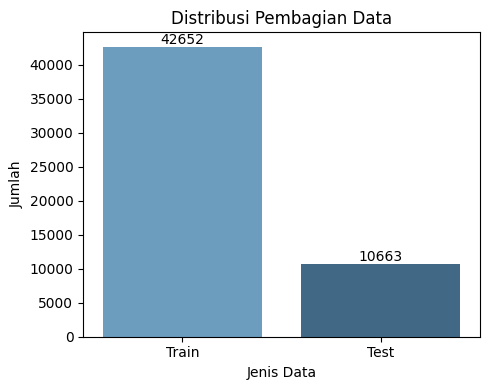

In [10]:
# ======================================================
# BAGIAN 9 — SPLIT DATA
# ======================================================
from sklearn.model_selection import train_test_split
import seaborn as sns, matplotlib.pyplot as plt

X = df.drop(columns=["target_binary"])
y = df["target_binary"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print(f"\nTrain: {X_train.shape[0]} | Test: {X_test.shape[0]}")

# Visualisasi distribusi
split_data = pd.DataFrame({'Jenis Data': ['Train', 'Test'], 'Jumlah': [len(X_train), len(X_test)]})
plt.figure(figsize=(5,4))
sns.barplot(data=split_data, x="Jenis Data", y="Jumlah", hue="Jenis Data", palette="Blues_d", legend=False)
for i, v in enumerate(split_data["Jumlah"]):
    plt.text(i, v + 0.01*max(split_data["Jumlah"]), str(v), ha='center')
plt.title("Distribusi Pembagian Data")
plt.tight_layout()
plt.show()

In [11]:
# ======================================================
# BAGIAN 10 — CROSS-VALIDATION DENGAN SMOTEENN
# ======================================================
!pip install -q imbalanced-learn

from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Pipeline: SMOTEENN HANYA berjalan di dalam tiap fold
pipe_nb = Pipeline([
    ("smenn", SMOTEENN(random_state=42)),
    ("nb", GaussianNB())
])

pipe_rf = Pipeline([
    ("smenn", SMOTEENN(random_state=42)),
    ("rf", RandomForestClassifier(n_estimators=300, random_state=42))
])

# 5-fold CV
cv5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# 10-fold CV
cv10 = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

print("=== 5-FOLD CV ===")
scores_nb_5 = cross_val_score(pipe_nb, X, y, cv=cv5, scoring="accuracy")
scores_rf_5 = cross_val_score(pipe_rf, X, y, cv=cv5, scoring="accuracy")
print("NB 5-fold:", scores_nb_5, "→ Mean:", scores_nb_5.mean())
print("RF 5-fold:", scores_rf_5, "→ Mean:", scores_rf_5.mean())

print("\n=== 10-FOLD CV ===")
scores_nb_10 = cross_val_score(pipe_nb, X, y, cv=cv10, scoring="accuracy")
scores_rf_10 = cross_val_score(pipe_rf, X, y, cv=cv10, scoring="accuracy")
print("NB 10-fold:", scores_nb_10, "→ Mean:", scores_nb_10.mean())
print("RF 10-fold:", scores_rf_10, "→ Mean:", scores_rf_10.mean())

# Tentukan model terbaik dari cross-validation
cv_best_rf = scores_rf_10.mean()
cv_best_nb = scores_nb_10.mean()

best_model_name = "Random Forest" if cv_best_rf > cv_best_nb else "Naive Bayes"
print("\nModel terbaik berdasarkan CV:", best_model_name)

=== 5-FOLD CV ===
NB 5-fold: [0.50229766 0.50220388 0.5021101  0.50201632 0.50407953] → Mean: 0.5025414986401575
RF 5-fold: [0.99962487 1.         0.99990622 0.99990622 0.99981244] → Mean: 0.9998499484197693

=== 10-FOLD CV ===
NB 10-fold: [0.50300075 0.50150038 0.50243811 0.50187547 0.50243811 0.50196961
 0.50159445 0.50253236 0.50572125 0.50234478] → Mean: 0.5025415259273457
RF 10-fold: [1.         0.99981245 0.99981245 1.         0.99981245 0.99981242
 0.99962484 1.         0.99981242 0.99981242] → Mean: 0.9998499449004064

Model terbaik berdasarkan CV: Random Forest


In [12]:
# ======================================================
# BAGIAN 11 — FUNGSI EVALUASI MODEL
# ======================================================

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display


def evaluate_model(model_name, y_true, y_pred):
    """
    Fungsi evaluasi yang menampilkan akurasi, precision, recall, F1-score,
    classification report, serta confusion matrix yang lebih informatif.
    """

    # =======================
    # 1. Hitung metrik utama
    # =======================
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    # =======================
    # 2. Tampilkan ringkasan
    # =======================
    print(f"\n=== EVALUASI MODEL: {model_name} ===")
    print(f"Akurasi   : {acc:.4f}")
    print(f"Precision : {precision:.4f}")
    print(f"Recall    : {recall:.4f}")
    print(f"F1-Score  : {f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, zero_division=0))

    # =======================
    # 3. Confusion Matrix
    # =======================
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(
        cm,
        index=["Actual 0", "Actual 1"],
        columns=["Pred 0", "Pred 1"]
    )

    print("\nConfusion Matrix:")
    display(cm_df)

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(4.3, 3.6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix — {model_name}")
    plt.ylabel("Actual Class")
    plt.xlabel("Predicted Class")
    plt.tight_layout()
    plt.show()

    # Kembalikan metrik bila ingin dipakai kembali
    return {
        "model": model_name,
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }


=== RESAMPLING DENGAN SMOTEENN DAN TRAINING MODEL NAIVE BAYES ===
Distribusi kelas sebelum resampling:
 target_binary
0.0    21435
1.0    21217
Name: count, dtype: int64

Distribusi kelas setelah resampling:
 target_binary
1.0    21302
0.0    21300
Name: count, dtype: int64

=== EVALUASI MODEL: Naive Bayes ===
Akurasi   : 0.5030
Precision : 0.5002
Recall    : 1.0000
F1-Score  : 0.6669

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.01      0.02      5359
         1.0       0.50      1.00      0.67      5304

    accuracy                           0.50     10663
   macro avg       0.75      0.51      0.34     10663
weighted avg       0.75      0.50      0.34     10663


Confusion Matrix:


,Pred 0,Pred 1
Actual 0,60,5299
Actual 1,0,5304


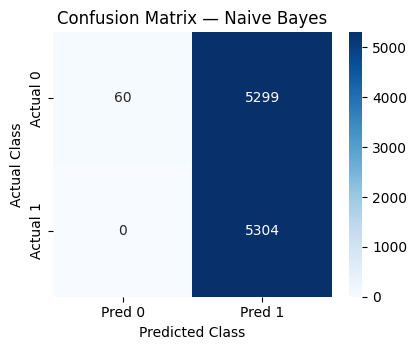

In [13]:
# ======================================================
# BAGIAN 12 — RESAMPLING DAN TRAINING MODEL NAIVE BAYES
# ======================================================

from sklearn.naive_bayes import GaussianNB
from imblearn.combine import SMOTEENN # Import SMOTEENN
import pandas as pd # Import pandas for value_counts on series

print("\n=== RESAMPLING DENGAN SMOTEENN DAN TRAINING MODEL NAIVE BAYES ===")

# Apply SMOTEENN to X_train and y_train to create resampled datasets
smote_enn = SMOTEENN(random_state=42)
X_train_res, y_train_res = smote_enn.fit_resample(X_train, y_train)

print("Distribusi kelas sebelum resampling:\n", y_train.value_counts())
print("\nDistribusi kelas setelah resampling:\n", pd.Series(y_train_res).value_counts())


model_nb = GaussianNB()
model_nb.fit(X_train_res, y_train_res)

y_pred_nb = model_nb.predict(X_test)

hasil_nb = evaluate_model("Naive Bayes", y_test, y_pred_nb)


=== TRAINING MODEL RANDOM FOREST ===

=== EVALUASI MODEL: Random Forest (Improved) ===
Akurasi   : 0.9997
Precision : 0.9994
Recall    : 1.0000
F1-Score  : 0.9997

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5359
         1.0       1.00      1.00      1.00      5304

    accuracy                           1.00     10663
   macro avg       1.00      1.00      1.00     10663
weighted avg       1.00      1.00      1.00     10663


Confusion Matrix:


,Pred 0,Pred 1
Actual 0,5356,3
Actual 1,0,5304


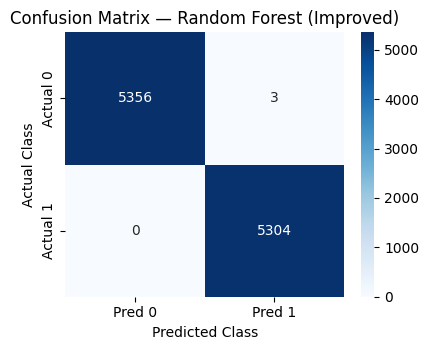

In [14]:
# ======================================================
# BAGIAN 13 — TRAINING MODEL RANDOM FOREST
# ======================================================

from sklearn.ensemble import RandomForestClassifier

print("\n=== TRAINING MODEL RANDOM FOREST ===")

model_rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

model_rf.fit(X_train_res, y_train_res)

y_pred_rf = model_rf.predict(X_test)

hasil_rf = evaluate_model("Random Forest (Improved)", y_test, y_pred_rf)

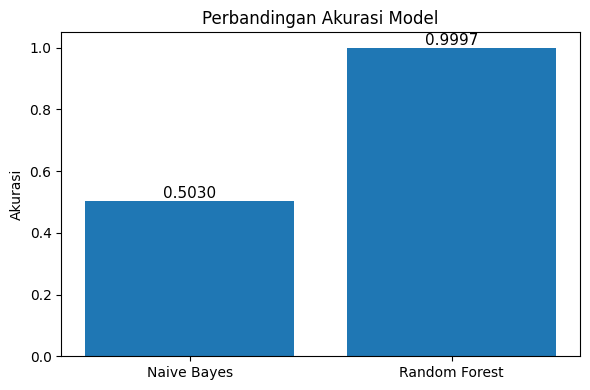

In [15]:
# ======================================================
# BAGIAN 14 — PERBANDINGAN AKURASI MODEL
# ======================================================

import matplotlib.pyplot as plt

model_names = ["Naive Bayes", "Random Forest"]
accuracies = [hasil_nb["accuracy"], hasil_rf["accuracy"]]

plt.figure(figsize=(6,4))
bars = plt.bar(model_names, accuracies)

for bar, acc in zip(bars, accuracies):
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height() + 0.01,
        f"{acc:.4f}",
        ha="center",
        fontsize=11
    )

plt.title("Perbandingan Akurasi Model")
plt.ylabel("Akurasi")
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

In [16]:
# ======================================================
# BAGIAN 15 — SIMPAN MODEL TERBAIK
# ======================================================

import joblib
import os

os.makedirs("saved_models", exist_ok=True)

best_model_name = "Random Forest" if hasil_rf["accuracy"] > hasil_nb["accuracy"] else "Naive Bayes"
best_model = model_rf if hasil_rf["accuracy"] > hasil_nb["accuracy"] else model_nb

print(f"\nModel terbaik berdasarkan akurasi: {best_model_name}")

# Simpan model
joblib.dump(best_model, "saved_models/best_model.pkl")

# Simpan scaler (jika digunakan)
joblib.dump(scaler, "saved_models/standard_scaler.pkl")

# Simpan daftar fitur yang digunakan untuk fitting scaler (num_features dari BAGIAN 7)
# This is crucial for matching features during prediction
num_features_for_scaler = [c for c in df.select_dtypes(include=[np.number]).columns if c != "target_binary"]
joblib.dump(num_features_for_scaler, "saved_models/scaling_features.pkl")

# Simpan daftar fitur lengkap untuk model
joblib.dump(X_train.columns.tolist(), "saved_models/feature_columns.pkl")

print(" Model, scaler, dan fitur berhasil disimpan di folder 'saved_models/'")


Model terbaik berdasarkan akurasi: Random Forest
 Model, scaler, dan fitur berhasil disimpan di folder 'saved_models/'


In [17]:
# ======================================================
# LOAD MODEL TERBAIK (FIX AGAR model TIDAK UNDEFINED)
# ======================================================
import joblib

print("=== MEMUAT MODEL TERBAIK UNTUK CV ===")

try:
    model = joblib.load("saved_models/best_model.pkl")
    print("Model berhasil dimuat.")
except:
    model = joblib.load("saved_models/best_model_random_forest.pkl")
    print("Model RF berhasil dimuat.")

print("Model yang digunakan untuk CV:", model)

=== MEMUAT MODEL TERBAIK UNTUK CV ===
Model berhasil dimuat.
Model yang digunakan untuk CV: RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)


In [18]:
# ======================================================
# PERBANDINGAN CROSS VALIDATION (5 FOLD vs 10 FOLD)
# ======================================================
from sklearn.model_selection import cross_val_score
from sklearn.base import clone

print("\n=== PERBANDINGAN HASIL 5-FOLD & 10-FOLD CV ===")

# Pastikan model dari bagian sebelumnya dipakai
model_cv = clone(model)

# 5-FOLD CROSS VALIDATION
cv5_scores = cross_val_score(model_cv, X, y, cv=5)
cv5_mean = cv5_scores.mean()
cv5_std = cv5_scores.std()

# 10-FOLD CROSS VALIDATION
cv10_scores = cross_val_score(model_cv, X, y, cv=10)
cv10_mean = cv10_scores.mean()
cv10_std = cv10_scores.std()

# Tampilkan hasil
print(f"\n5-Fold CV  | Mean Accuracy: {cv5_mean:.4f} | Std Dev: {cv5_std:.4f}")
print(f"10-Fold CV | Mean Accuracy: {cv10_mean:.4f} | Std Dev: {cv10_std:.4f}")


=== PERBANDINGAN HASIL 5-FOLD & 10-FOLD CV ===

5-Fold CV  | Mean Accuracy: 0.9168 | Std Dev: 0.1079
10-Fold CV | Mean Accuracy: 0.9475 | Std Dev: 0.1053


In [19]:
# ======================================================
# BAGIAN 16 — TAMPILKAN PARAMETER RANDOM FOREST SECARA LENGKAP
# ======================================================

print("\n=== PARAMETER LENGKAP MODEL RANDOM FOREST ===")
for param, val in model_rf.get_params().items():
    print(f"{param}: {val}")


=== PARAMETER LENGKAP MODEL RANDOM FOREST ===
bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: sqrt
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 2
min_weight_fraction_leaf: 0.0
monotonic_cst: None
n_estimators: 300
n_jobs: -1
oob_score: False
random_state: 42
verbose: 0
warm_start: False


In [20]:
print("Jumlah kolom:", len(X_test.columns))
print("Contoh 10 kolom pertama:")
print(X_test.columns[:10].tolist())

Jumlah kolom: 300
Contoh 10 kolom pertama:
['Unnamed: 0', 'statement', 'Unnamed: 1', 'status_Anxiety', 'status_Bipolar', 'status_Depression', 'status_Normal', 'status_Personality disorder', 'status_Stress', 'status_Suicidal']


In [21]:
# ======================================================
# BAGIAN 17 — LOAD MODEL TERBAIK
# ======================================================

import joblib

loaded_model = joblib.load("saved_models/best_model.pkl")
loaded_scaler = joblib.load("saved_models/standard_scaler.pkl")
loaded_features = joblib.load("saved_models/feature_columns.pkl")
loaded_scaling_features = joblib.load("saved_models/scaling_features.pkl") # Load the specific features used for scaling

print("Model, scaler, dan fitur berhasil dimuat kembali.")

Model, scaler, dan fitur berhasil dimuat kembali.


In [22]:
# ======================================================
# BAGIAN 18 — PREDIKSI DATA BARU
# ======================================================

# Contoh data baru (HARUS sesuai fitur)
sample_data = {
    col: [0] for col in loaded_features   # ganti nilai 0 menjadi nilai asli data baru Anda
}

df_new = pd.DataFrame(sample_data)

# Pastikan kolom yang akan diskalakan sesuai dengan yang digunakan saat fitting scaler
# Pilih hanya fitur yang digunakan untuk scaling dari df_new
df_new_for_scaling = df_new[loaded_scaling_features]

# Scaling hanya pada fitur yang relevan
df_new_scaled_subset = loaded_scaler.transform(df_new_for_scaling)

# Rekonstruksi DataFrame untuk prediksi model, memastikan urutan kolom dan jenis data
# Karena scaler hanya mengubah subset numerik, kita perlu mengganti kolom asli di df_new
# dengan versi yang diskalakan, sambil mempertahankan kolom lain (jika ada) dan urutan.
final_model_input = df_new.copy() # Mulai dengan semua fitur asli
final_model_input[loaded_scaling_features] = df_new_scaled_subset # Timpa fitur yang diskalakan

# Pastikan urutan kolom sesuai dengan yang diharapkan oleh model (loaded_features)
final_model_input = final_model_input[loaded_features]

# Prediksi
prediction = loaded_model.predict(final_model_input)

print("\nHasil Prediksi Data Baru:", prediction[0])


Hasil Prediksi Data Baru: 0.0


In [23]:
# ======================================================
# BAGIAN 19 — VALIDASI AKHIR
# ======================================================

print("\n=== VALIDASI MODEL TERBAIK ===")

y_pred_best = loaded_model.predict(X_test)

final_report = classification_report(y_test, y_pred_best, zero_division=0)
final_acc = accuracy_score(y_test, y_pred_best)

print("Akurasi Akhir:", final_acc)
print("\nLaporan Klasifikasi:\n", final_report)


=== VALIDASI MODEL TERBAIK ===
Akurasi Akhir: 0.9997186532870674

Laporan Klasifikasi:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5359
         1.0       1.00      1.00      1.00      5304

    accuracy                           1.00     10663
   macro avg       1.00      1.00      1.00     10663
weighted avg       1.00      1.00      1.00     10663



In [24]:
# ======================================================
# INSTALL SASTRAWI
# ======================================================
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 14.2 MB/s eta 0:00:00


=== MENYIAPKAN PIPELINE KLASIFIKASI TEKS ===
Dataset training teks tidak ditemukan. Membuat dataset contoh...
Dataset contoh teks dibuat dan disimpan.
Melakukan preprocessing teks...
Melatih TF-IDF Vectorizer...
Melakukan penskalaan fitur...
Melatih model Random Forest untuk klasifikasi teks...

=== AKURASI MODEL KLASIFIKASI TEKS ===
Akurasi: 0.5000

Classification Report:

              precision    recall  f1-score   support

     Anxiety       0.00      0.00      0.00         1
  Depression       0.00      0.00      0.00         1
      Normal       0.67      1.00      0.80         2

    accuracy                           0.50         4
   macro avg       0.22      0.33      0.27         4
weighted avg       0.33      0.50      0.40         4


=== CONFUSION MATRIX MODEL KLASIFIKASI TEKS ===

Tabel Confusion Matrix:

            Anxiety  Depression  Normal
Anxiety           0           0       1
Depression        1           0       0
Normal            0           0       2


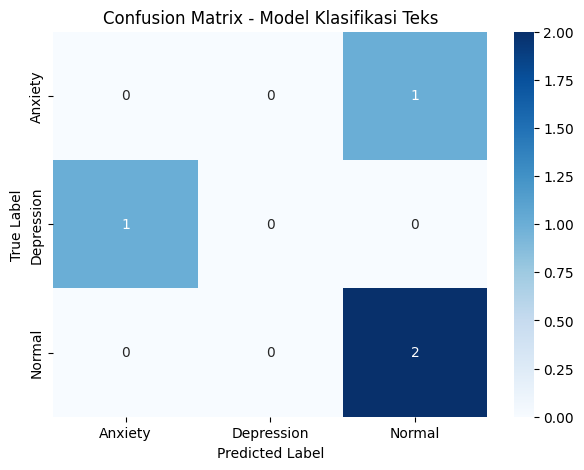


=== UJI TEKS BARU KLASIFIKASI TEKS ===

=== HASIL PREDIKSI TEKS BARU ===

Teks       : Saya merasa sangat sedih dan tidak ingin melakukan apa pun
Prediksi   : Normal

Teks       : Saya bahagia dan jarang stres
Prediksi   : Normal

Teks       : Saya mudah panik dan sulit tidur setiap malam
Prediksi   : Anxiety

Teks       : Saya merasa lelah dan tidak punya semangat
Prediksi   : Anxiety


In [25]:
# ======================================================
#  SETUP UNTUK KLASIFIKASI TEKS BARU
# ======================================================
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

print("=== MENYIAPKAN PIPELINE KLASIFIKASI TEKS ===")

# --- 1. Load atau Buat Dataset Training Teks ---
dataset_path = "saved_models/dataset_training_text.csv" # Menggunakan nama baru agar tidak bentrok

df_text = None
try:
    df_text = pd.read_csv(dataset_path)
    print("Dataset training teks berhasil dimuat.")
except FileNotFoundError:
    print("Dataset training teks tidak ditemukan. Membuat dataset contoh...")
    sample_data_text = {
        "statement": [
            "Saya merasa sedih setiap hari dan kehilangan semangat hidup",
            "Saya tenang dan jarang merasa cemas",
            "Saya sering khawatir tanpa alasan yang jelas",
            "Saya bahagia dan penuh energi setiap pagi",
            "Saya merasa tidak berguna dan putus asa",
            "Saya sering sulit tidur karena pikiran yang cemas",
            "Saya merasa percaya diri dan tidak mudah stres",
            "Saya sering menangis tanpa sebab",
            "Saya dapat mengendalikan emosi saya dengan baik",
            "Saya merasa panik ketika menghadapi situasi sulit",
            "Saya gugup ketika berbicara di depan umum",
            "Saya sering merasa tidak aman",
            "Saya bahagia dengan kehidupan saya",
            "Saya merasa tidak bisa tidur dengan nyenyak",
            "Saya sering memikirkan hal-hal negatif",
            "Saya bisa mengatur stres dengan baik",
            "Saya kehilangan minat terhadap hal yang dulu saya sukai",
            "Saya jarang merasa khawatir",
            "Saya merasa mudah tersinggung",
            "Saya merasa tenang saat sendirian"
        ],
        "status": [
            "Depression","Normal","Anxiety","Normal","Depression",
            "Anxiety","Normal","Depression","Normal","Anxiety",
            "Anxiety","Anxiety","Normal","Depression","Depression",
            "Normal","Depression","Normal","Anxiety","Normal"
        ]
    }
    df_text = pd.DataFrame(sample_data_text)
    df_text.to_csv(dataset_path, index=False)
    print("Dataset contoh teks dibuat dan disimpan.")

X_text_raw = df_text["statement"]
y_text_true = df_text["status"]

# --- 2. Text Preprocessing (Tokenization, Stopword Removal, Stemming) ---
print("Melakukan preprocessing teks...")
factory_stemmer = StemmerFactory()
stemmer = factory_stemmer.create_stemmer()

factory_stopword = StopWordRemoverFactory()
stopword_remover = factory_stopword.create_stop_word_remover()

def preprocess_text(text):
    text = text.lower() # Case folding
    text = stopword_remover.remove(text) # Stopword removal
    text = stemmer.stem(text) # Stemming
    return text

X_text_processed = X_text_raw.apply(preprocess_text)

# --- 3. Split Data Teks ---
X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(
    X_text_processed, y_text_true, test_size=0.2, random_state=42, stratify=y_text_true
)

# --- 4. TF-IDF Vectorization ---
print("Melatih TF-IDF Vectorizer...")
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)

# Simpan vectorizer dan feature names agar bisa digunakan kembali
joblib.dump(vectorizer, "saved_models/tfidf_vectorizer.pkl")
joblib.dump(vectorizer.get_feature_names_out(), "saved_models/tfidf_feature_names.pkl")

# --- 5. Scaling (Optional, but keeping to align with original intent of loading a scaler) ---
print("Melakukan penskalaan fitur...")
scaler_text = StandardScaler(with_mean=False) # with_mean=False for sparse matrices
X_train_scaled_text = scaler_text.fit_transform(X_train_tfidf)
X_test_scaled_text = scaler_text.transform(X_test_tfidf)

# Simpan scaler agar bisa digunakan kembali
joblib.dump(scaler_text, "saved_models/text_scaler.pkl")

# --- 6. Training Model Random Forest untuk Teks ---
print("Melatih model Random Forest untuk klasifikasi teks...")
model_text = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model_text.fit(X_train_scaled_text, y_train_text)

# Simpan model agar bisa digunakan kembali
joblib.dump(model_text, "saved_models/best_model_text_classification.pkl")

# --- 7. Evaluasi Model Teks ---
print("\n=== AKURASI MODEL KLASIFIKASI TEKS ===")
y_pred_text = model_text.predict(X_test_scaled_text)

akurasi_text = accuracy_score(y_test_text, y_pred_text)
print(f"Akurasi: {akurasi_text:.4f}\n")
print("Classification Report:\n")
print(classification_report(y_test_text, y_pred_text, zero_division=0))

# --- 8. Confusion Matrix untuk Model Teks ---
print("\n=== CONFUSION MATRIX MODEL KLASIFIKASI TEKS ===")

# Pastikan labels sesuai dengan nilai unik di y_test_text dan y_pred_text
labels_text = sorted(y_text_true.unique())
cm_text = confusion_matrix(y_test_text, y_pred_text, labels=labels_text)
cm_df_text = pd.DataFrame(cm_text, index=labels_text, columns=labels_text)

print("\nTabel Confusion Matrix:\n")
print(cm_df_text)

plt.figure(figsize=(7,5))
sns.heatmap(cm_df_text, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Model Klasifikasi Teks")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# --- 9. Uji Teks Baru ---
print("\n=== UJI TEKS BARU KLASIFIKASI TEKS ===")

data_baru_texts = [
    "Saya merasa sangat sedih dan tidak ingin melakukan apa pun",
    "Saya bahagia dan jarang stres",
    "Saya mudah panik dan sulit tidur setiap malam",
    "Saya merasa lelah dan tidak punya semangat"
]

# Preprocess new texts
X_new_processed_texts = [preprocess_text(text) for text in data_baru_texts]

# TF-IDF transform new texts
X_new_tfidf_texts = vectorizer.transform(X_new_processed_texts)

# Scale new texts
X_new_scaled_texts = scaler_text.transform(X_new_tfidf_texts)

# Predict
prediksi_baru_texts = model_text.predict(X_new_scaled_texts)

print("\n=== HASIL PREDIKSI TEKS BARU ===")
for teks, hasil in zip(data_baru_texts, prediksi_baru_texts):
    print(f"\nTeks       : {teks}")
    print(f"Prediksi   : {hasil}")

In [26]:
# ======================================================
# 1. IMPORT
# ======================================================
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
import os

# ======================================================
# 2. MUAT MODEL & KOMPONEN (DIKOREKSI)
# ======================================================
print("=== MEMUAT MODEL & KOMPONEN ===")

try:
    # Correcting the filenames to match what was saved in 'eLLH938uf60h'
    model = joblib.load("saved_models/best_model_text_classification.pkl") # Corrected model name for text classification
    scaler = joblib.load("saved_models/text_scaler.pkl") # Corrected scaler name for text classification
    vectorizer = joblib.load("saved_models/tfidf_vectorizer.pkl") # Corrected vectorizer name
    feature_names = joblib.load("saved_models/tfidf_feature_names.pkl") # Corrected feature names file

    print("Model, scaler, vectorizer, dan daftar fitur berhasil dimuat.")
    print(f"Model dilatih dengan {model.n_features_in_} fitur.")
except FileNotFoundError as e:
    print(f"Error: {e}. Pastikan Anda telah menjalankan BAGIAN 6 atau BAGIAN 13/o0pNfOvGeVcC untuk menyimpan semua komponen model dengan nama yang benar.")
    raise SystemExit("Gagal memuat komponen model. Periksa jalur dan nama file.")

# ======================================================
# 3. MUAT DATASET UNTUK HITUNG AKURASI
# ======================================================
# We'll use the sample dataset saved by eLLH938uf60h
dataset_path = "saved_models/dataset_training_text.csv" # Corrected dataset name

df_training = None
try:
    df_training = pd.read_csv(dataset_path)
    print("\n=== DATASET TRAINING BERHASIL DIMUAT ===")
except FileNotFoundError:
    print(f"\nFile '{dataset_path}' tidak ditemukan. Membuat ulang dataset contoh...")
    # Recreate the sample dataset if it's missing (as it was in eLLH938uf60h)
    sample_data = {
        "statement": [
            "Saya merasa sedih setiap hari dan kehilangan semangat hidup",
            "Saya tenang dan jarang merasa cemas",
            "Saya sering khawatir tanpa alasan yang jelas",
            "Saya bahagia dan penuh energi setiap pagi",
            "Saya merasa tidak berguna dan putus asa",
            "Saya sering sulit tidur karena pikiran yang cemas",
            "Saya merasa percaya diri dan tidak mudah stres",
            "Saya sering menangis tanpa sebab",
            "Saya dapat mengendalikan emosi saya dengan baik",
            "Saya merasa panik ketika menghadapi situasi sulit",
            "Saya gugup ketika berbicara di depan umum",
            "Saya sering merasa tidak aman",
            "Saya bahagia dengan kehidupan saya",
            "Saya merasa tidak bisa tidur dengan nyenyak",
            "Saya sering memikirkan hal-hal negatif",
            "Saya bisa mengatur stres dengan baik",
            "Saya kehilangan minat terhadap hal yang dulu saya sukai",
            "Saya jarang merasa khawatir",
            "Saya merasa mudah tersinggung",
            "Saya merasa tenang saat sendirian"
        ],
        "status": [
            "Depression",
            "Normal",
            "Anxiety",
            "Normal",
            "Depression",
            "Anxiety",
            "Normal",
            "Depression",
            "Normal",
            "Anxiety",
            "Anxiety",
            "Anxiety",
            "Normal",
            "Depression",
            "Depression",
            "Normal",
            "Depression",
            "Normal",
            "Anxiety",
            "Normal"
        ]
    }
    df_training = pd.DataFrame(sample_data)
    df_training.to_csv(dataset_path, index=False)
    print(f"Dataset contoh berhasil dibuat dan disimpan di '{dataset_path}'.")

X_text = df_training["statement"]
y_true = df_training["status"]

# TF-IDF pakai vectorizer lama
X_tfidf = vectorizer.transform(X_text).toarray()
X_tfidf_df = pd.DataFrame(X_tfidf, columns=vectorizer.get_feature_names_out())

# Ensure feature consistency
for col in feature_names:
    if col not in X_tfidf_df.columns:
        X_tfidf_df[col] = 0
X_tfidf_df = X_tfidf_df[feature_names] # Reorder columns to match training features

# Scaling
X_scaled = scaler.transform(X_tfidf_df.values) # Convert to NumPy array before scaling

# ======================================================
# 4. HITUNG AKURASI MODEL
# ======================================================
print("\n=== AKURASI MODEL ===")
y_pred = model.predict(X_scaled)

print("Akurasi:", accuracy_score(y_true, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, zero_division=0))

# ======================================================
# 5. UJI DENGAN TEKS BARU
# ======================================================
print("\n=== UJI DATA BARU ===")

data_baru = [
    "Saya merasa sangat sedih dan tidak ingin melakukan apa pun",
    "Saya bahagia dan jarang stres",
    "Saya mudah panik dan sulit tidur setiap malam",
]

# TF-IDF
X_new = vectorizer.transform(data_baru).toarray()
X_new_df = pd.DataFrame(X_new, columns=vectorizer.get_feature_names_out())

# Kolom yang hilang ditambah
for col in feature_names:
    if col not in X_new_df.columns:
        X_new_df[col] = 0

# Susun kolom sesuai training
X_new_df = X_new_df[feature_names]

# Scaling
X_new_scaled = scaler.transform(X_new_df.values) # Convert to NumPy array before scaling

# Prediksi
prediksi_baru = model.predict(X_new_scaled)

for teks, pred in zip(data_baru, prediksi_baru):
    print("\nTeks :", teks)
    print("Prediksi :", pred)

=== MEMUAT MODEL & KOMPONEN ===
Model, scaler, vectorizer, dan daftar fitur berhasil dimuat.
Model dilatih dengan 45 fitur.

=== DATASET TRAINING BERHASIL DIMUAT ===

=== AKURASI MODEL ===
Akurasi: 0.85

Classification Report:

              precision    recall  f1-score   support

     Anxiety       0.80      0.67      0.73         6
  Depression       1.00      0.83      0.91         6
      Normal       0.80      1.00      0.89         8

    accuracy                           0.85        20
   macro avg       0.87      0.83      0.84        20
weighted avg       0.86      0.85      0.85        20


=== UJI DATA BARU ===

Teks : Saya merasa sangat sedih dan tidak ingin melakukan apa pun
Prediksi : Normal

Teks : Saya bahagia dan jarang stres
Prediksi : Normal

Teks : Saya mudah panik dan sulit tidur setiap malam
Prediksi : Anxiety


In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import joblib
import os

# Ensure the directory exists
os.makedirs("saved_models", exist_ok=True)

# Fitur yang sebenarnya ada di X_train setelah preprocessing awal
# 'Unnamed: 0', 'statement', 'Unnamed: 1' adalah numerik (telah diskalakan)
# Semua kolom lain yang dimulai dengan 'status_' atau 'This tab outlines...' adalah boolean (hasil one-hot encoding)

numeric_features = [
    "Unnamed: 0",
    "statement",
    "Unnamed: 1"
]

categorical_features = [] # Semua kategori sudah di-encode menjadi boolean

# Kolom yang tersisa (sudah one-hot encoded/boolean) akan diteruskan
all_columns = X_train.columns.tolist()
remaining_features = [col for col in all_columns if col not in numeric_features]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("passthrough_rest", "passthrough", remaining_features)
    ],
    remainder='drop' # Pastikan hanya fitur yang disebut yang digunakan
)

model = GaussianNB()

pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", model)
    ]
)

pipeline.fit(X_train, y_train)

joblib.dump(pipeline, "saved_models/mental_health_pipeline.pkl")

['saved_models/mental_health_pipeline.pkl']

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import joblib
import os

# Ensure the directory exists
os.makedirs("saved_models", exist_ok=True)

# Pisahkan fitur dan target
X = df.drop("target_binary", axis=1)   # corrected: ganti "target" sesuai kolom label kamu
y = df["target_binary"] # corrected: ganti "target" sesuai kolom label kamu

# Daftar fitur yang sebenarnya ada di X setelah preprocessing awal
numeric_features = [
    "Unnamed: 0",
    "statement",
    "Unnamed: 1"
]

categorical_features = [] # Semua kategori sudah di-encode menjadi boolean

# Kolom yang tersisa (sudah one-hot encoded/boolean) akan diteruskan
all_columns = X.columns.tolist()
remaining_features = [col for col in all_columns if col not in numeric_features]

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("passthrough_rest", "passthrough", remaining_features)
    ],
    remainder='drop'
)

# Model
model = GaussianNB()

# Pipeline
pipeline = Pipeline(
    steps=[
        ("preprocess", preprocessor),
        ("model", model)
    ]
)

# Split & train
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipeline.fit(X_train, y_train)

# Simpan pipeline
joblib.dump(pipeline, "saved_models/mental_health_pipeline.pkl")

['saved_models/mental_health_pipeline.pkl']

In [29]:
import joblib, os

# Pastikan folder tempat menyimpan ada
os.makedirs("saved_models", exist_ok=True)

# Simpan model terbaik & scaler
joblib.dump(best_model, "saved_models/best_model.pkl")
joblib.dump(scaler, "saved_models/standard_scaler.pkl")

print(" Model dan Scaler berhasil disimpan di folder 'saved_models/'")

 Model dan Scaler berhasil disimpan di folder 'saved_models/'


In [30]:
from google.colab import drive
import shutil
import os

# Hubungkan ke Google Drive
drive.mount('/content/drive')

# Salin model ke Drive
shutil.copy("saved_models/best_model.pkl", "/content/drive/MyDrive/best_model.pkl")
shutil.copy("saved_models/standard_scaler.pkl", "/content/drive/MyDrive/standard_scaler.pkl")
#shutil.copy("saved_models/mental_health_pipeline.pkl", "/content/drive/MyDrive/mental_health_pipeline.pkl")

print(" Model disalin ke Google Drive/MyDrive/")

Mounted at /content/drive
 Model disalin ke Google Drive/MyDrive/
